<IPython.core.display.Javascript object>


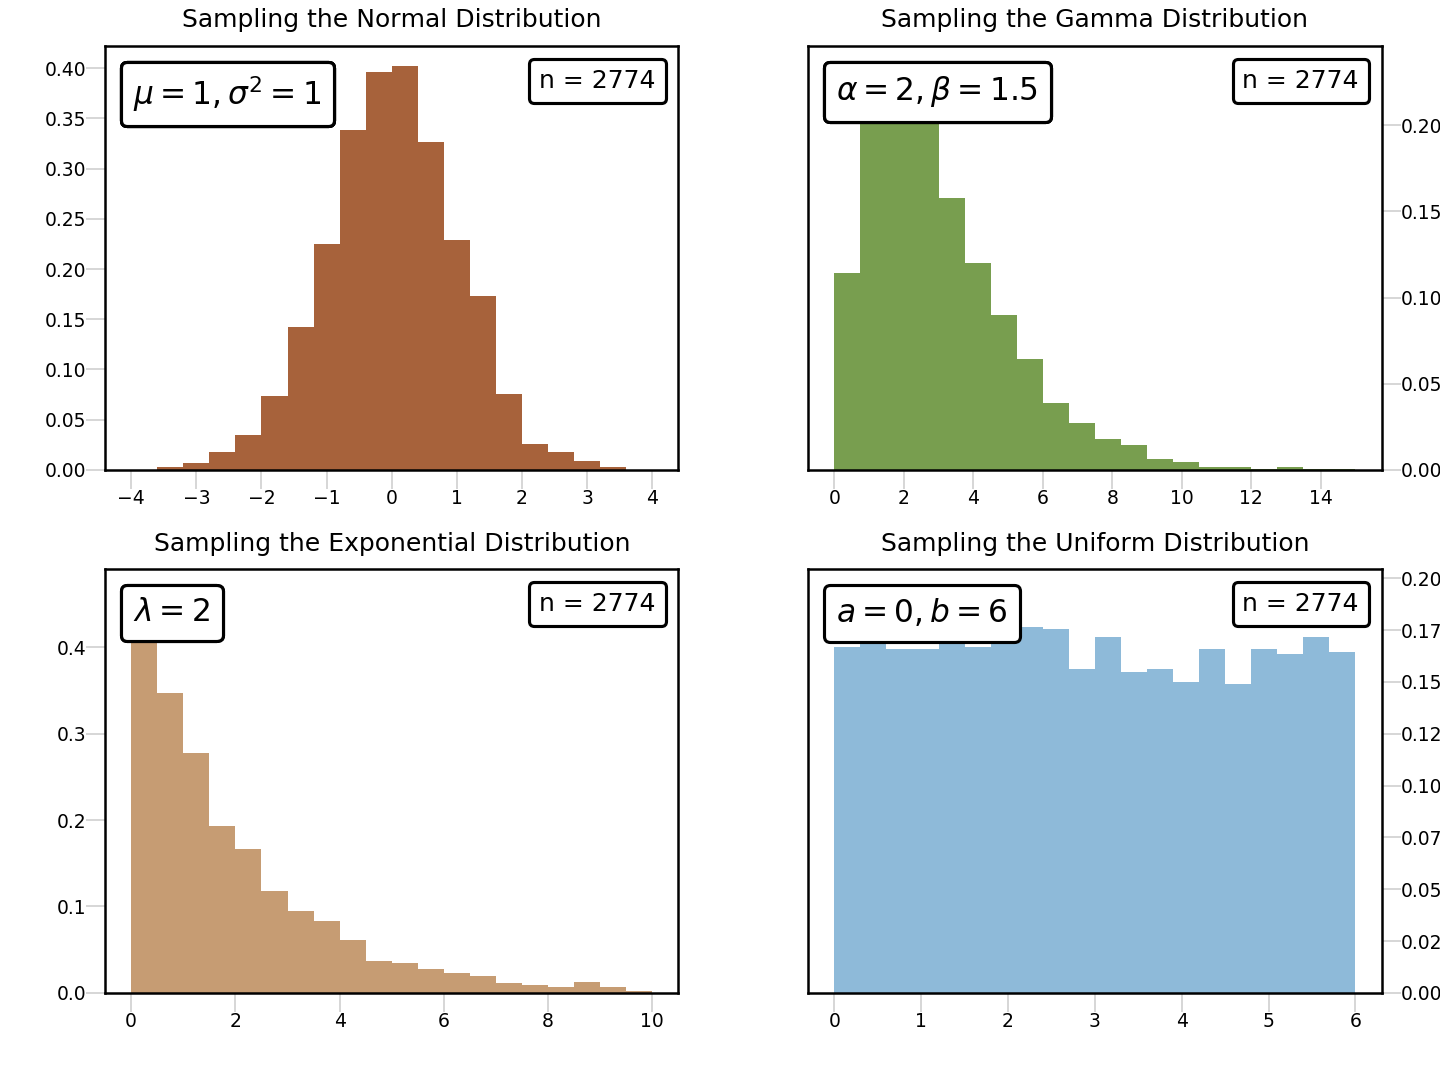

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from matplotlib.widgets import  SubplotTool

# generate 4 random samples of 10,000 from the random, gamma, exponential, and uniform distributions respectively.
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)
x4 = np.random.uniform(0,6, 10000)

# Create a figure with 4 sublots, one for each of the distributions to sample from.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout()
# Set the ticks for the rightmost subplots to appear on the right to prevent overlapping.
ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
plt.show()
# Set the size, direction and format of labels and ticks. Remove tick padding as it is chart junk.
for ax in (ax1,ax2,ax3,ax4):
    ax.tick_params(direction='out', size=6,pad=0,width=0.1,labelsize=6)

# Set a pause variable. Clicking on the chart resets the pause variable so that when clicked, a freezeframe
# of the chart for the number of current samples can be obtained. 
pause = False
def updateData(curr):
    # curr refers to the current frame
    if not pause:
        for ax in (ax1, ax2, ax3, ax4):
            ax.clear()
            # Draw a histogram in each subplot. The values will correspond to the samples generated.
            ax1.hist(x1[:curr], normed=True, bins=np.linspace(-4,4, num=21), alpha=0.5)
            ax2.hist(x2[:curr], normed=True, bins=np.linspace(0,15,num=21), alpha=0.5)
            ax3.hist(x3[:curr], normed=True, bins=np.linspace(0,10,num=21), alpha=0.5)
            ax4.hist(x4[:curr], normed=True, bins=np.linspace(0,6,num=21), alpha=0.5)
            # Set titles according to the distribution sampled in each subplot.
            ax1.set_title('Sampling the Normal Distribution',size=8)
            ax2.set_title('Sampling the Gamma Distribution',size=8)
            ax3.set_title('Sampling the Exponential Distribution',size=8)
            ax4.set_title('Sampling the Uniform Distribution',size=8)
            # Add a box to the top right of each subplot indicating how many samples have been drawn.
            at = AnchoredText('n = {}'.format(curr),
                                  prop=dict(size=8), frameon=True,
                                  loc=1,
                                  )
            at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
            ax.add_artist(at)
            # Set parameters for the normal distribution (note use of Latex language in Matplotlib).
            norm=AnchoredText(r'$\mu=1,\sigma^{2}=1$', frameon=True,loc=2,)
            norm.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
            # Add the parameter indicator to the top left of the normal plot.
            ax1.add_artist(norm)
            # Set parameters for gamma plot.
            gamma=AnchoredText(r'$\alpha=2,\beta=1.5$', frameon=True,loc=2,)
            gamma.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
            # Add parameter indicator to gamma plot.
            ax2.add_artist(gamma)
            # Set parameters for exponential plot.
            exponential=AnchoredText(r'$\lambda=2$',frameon=True,loc=2,)
            exponential.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
            # Add parameter box to exponential plotl
            ax3.add_artist(exponential)
            # Set parameters for uniform plot.
            uniform=AnchoredText(r'$a=0,b=6$', frameon=True,loc=2,)
            uniform.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
            # Add parameter box to exponential plot.
            ax4.add_artist(uniform)
        
def onClick(event):
    # Ensure that changes to pause by this function change the global pause variable rather than just changing it locally.
    # This will ensure the pause variable defined in updateData is also updated.
    global pause
    # Use exclusive or to return True only when variables are different. So if pause is currently False,
    # clicking on the figure will set pause to True. Clicking it again will then set pause to False.
    pause ^= True
    
# Create a buttom press event that uses the function above. On first click on the figure, pause is set to True. Plotting
# will stop and we get a freezeframe of the distributions for the current number of samples. While plotting stops, the
# model still moves through the frames so that when clicked again and pause is set to False, the graph whill display
# distributions with a larger number of samples, with the difference increasing in the time between clicks.
fig.canvas.mpl_connect('button_press_event', onClick)    
simulation = animation.FuncAnimation(fig, updateData, interval=10, repeat=False)
plt.show()





## Future Improvements

An interesting way of improving these animations would be to include a widget that lets the user select the parameters of each distribution